In [12]:
import pickle
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv("data/activity_train.csv", header=None)
train.columns = ["uniprot_id", "mol_id", "activity"]

test = pd.read_csv("data/activity_test_blanked.csv", header=None)
test.columns = ["uniprot_id", "mol_id", "activity"]


with open("data/mol_bits.pkl", "rb") as fh:
    data = pickle.load(fh)

# Extracting unique features for sparse matrix dims
all_feats = set()
for feats_set in data.values():
    all_feats.update(feats_set)

n_feats = max(all_feats) + 1  # 0-based indexing

# Creating sparse matrix mol feats
rows, cols = [], []
for i, (uniprot_id, feats_set) in enumerate(data.items()):
    rows.extend([i] * len(feats_set))
    cols.extend(feats_set)

mol_feats = csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(len(data), n_feats))
molecule_ids = list(data.keys())


prot_ids = train["uniprot_id"].unique().tolist()

In [14]:
train

,uniprot_id,mol_id,activity
0,O14842,CHEMBL2022243,4
1,O14842,CHEMBL2022244,6
2,O14842,CHEMBL2022245,2
3,O14842,CHEMBL2022246,1
4,O14842,CHEMBL2022247,4
...,...,...,...
135706,Q9Y5Y4,CHEMBL4214909,6
135707,Q9Y5Y4,CHEMBL4218012,2
135708,Q9Y5Y4,CHEMBL4217503,7
135709,Q9Y5Y4,CHEMBL4204359,8


## Some protein and molecule Bias

<Axes: xlabel='uniprot_id'>

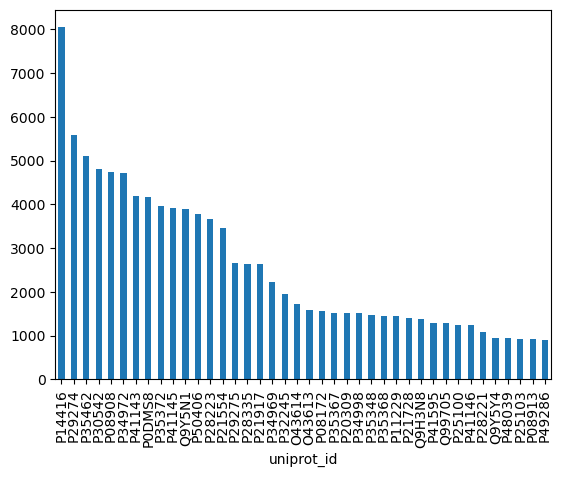

In [20]:
train["uniprot_id"].value_counts().head(40).plot(kind="bar")

<Axes: xlabel='mol_id'>

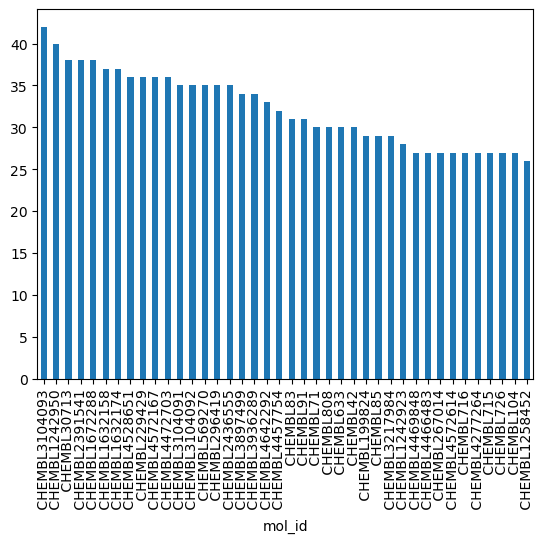

In [23]:
train["mol_id"].value_counts().head(40).plot(kind="bar")